# Explore

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p
from scipy import stats



#### Store data

In [2]:
store = p.prep_store_data()

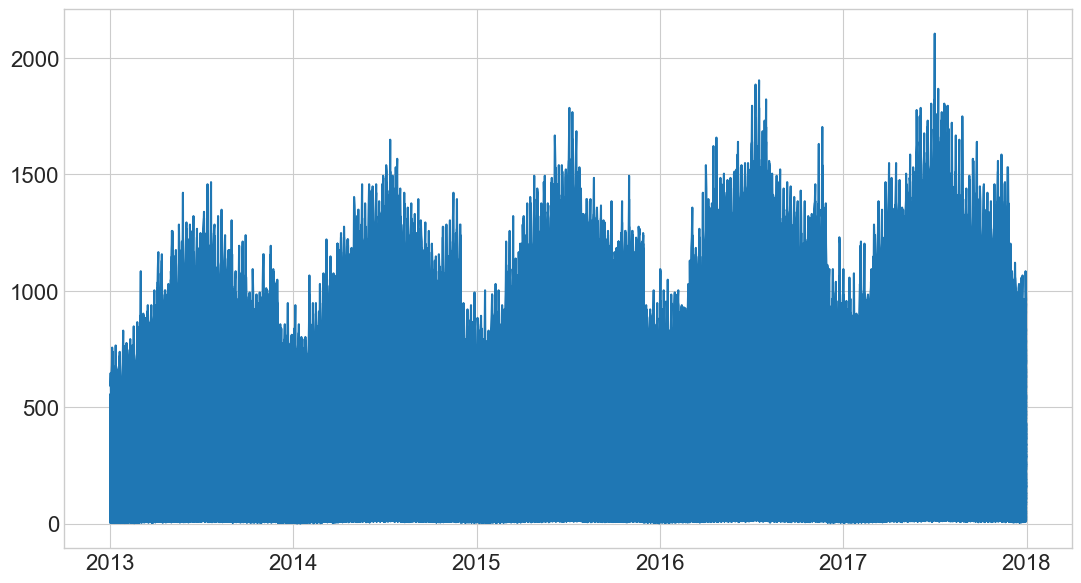

In [3]:
plt.plot(store.index, store.sales_total)

plt.show()

In [4]:
store.head()

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-02,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Wednesday,9.24
2013-01-03,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Thursday,11.76
2013-01-04,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Friday,10.92
2013-01-05,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Saturday,8.40


In [5]:
store.index.year.sort_values(ascending=False).value_counts()

2016    183000
2017    182500
2015    182500
2014    182500
2013    182500
Name: sale_date, dtype: int64

### Train, Test for exlplore

In [6]:
train = store.loc[:'2016']

In [7]:
test = store.loc['2017':]

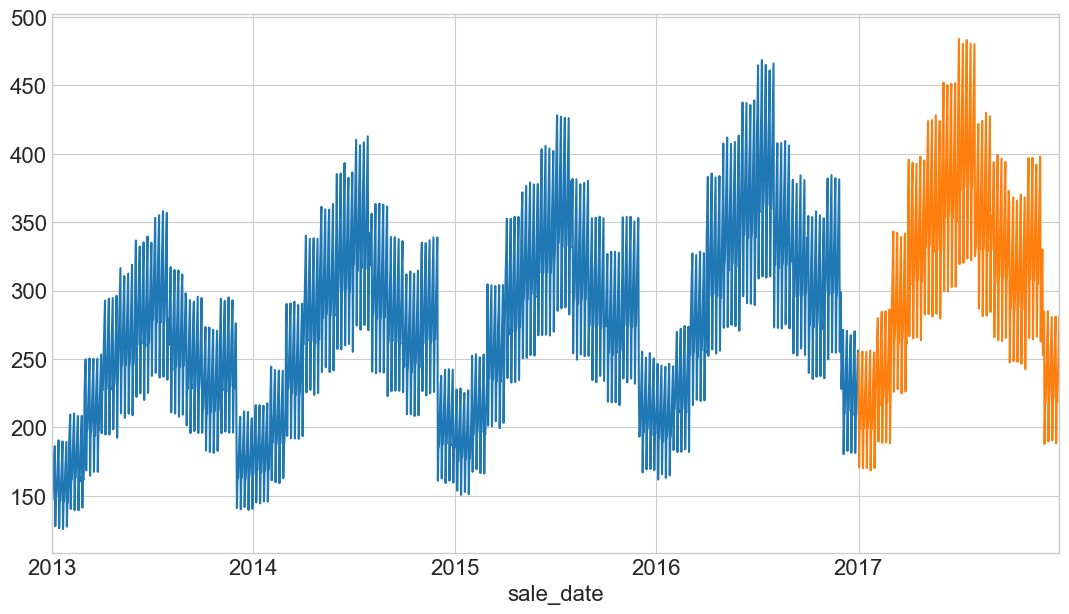

In [8]:
train.resample('D').sales_total.mean().plot()
test.resample('D').sales_total.mean().plot()
plt.show()


In [9]:
train.size / store.size

0.8001095290251917

In [10]:
test.size/ store.size

0.19989047097480833

Decided to use year to train/test split becasue my target will be sales total and i wanted to keep them 
even with a yearly break. It also happens that splitting at 2017 gave a pretty even 80% train and 20% test. 

 ### average sales total by month

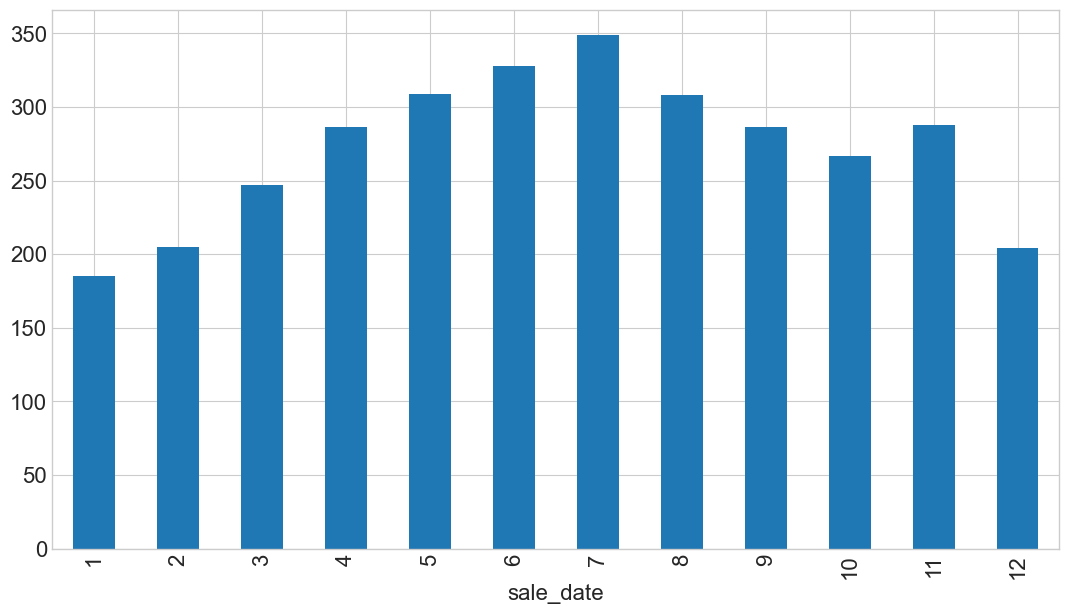

In [11]:
train.groupby(train.index.month).sales_total.mean().plot.bar()
plt.show()

In [12]:
y = train.sales_total

### weekly averagle sales

<AxesSubplot:xlabel='sale_date'>

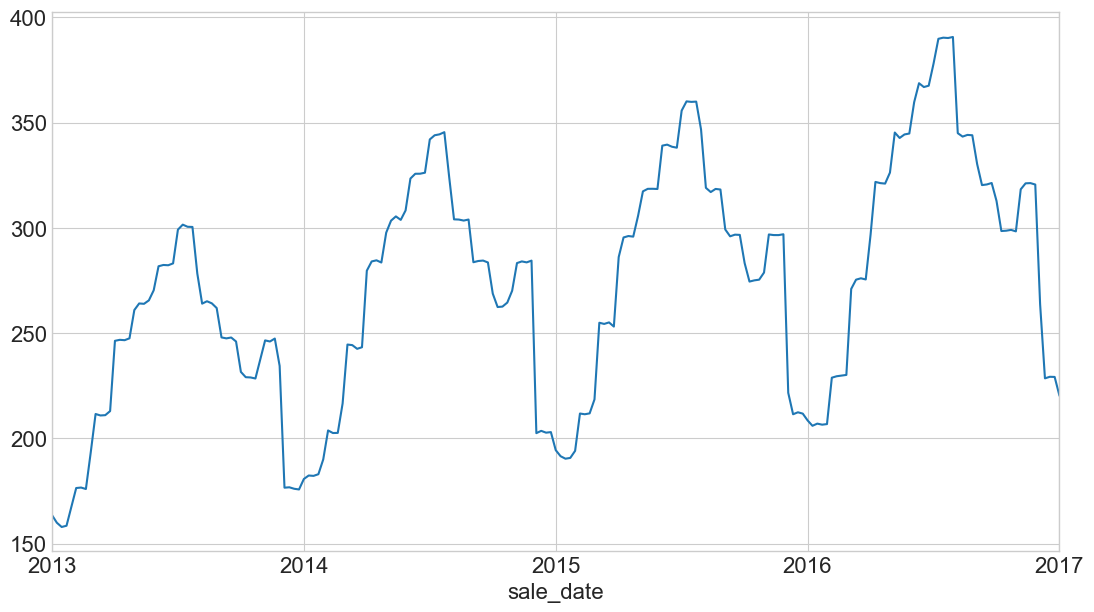

In [13]:
y.resample('W').mean().plot()


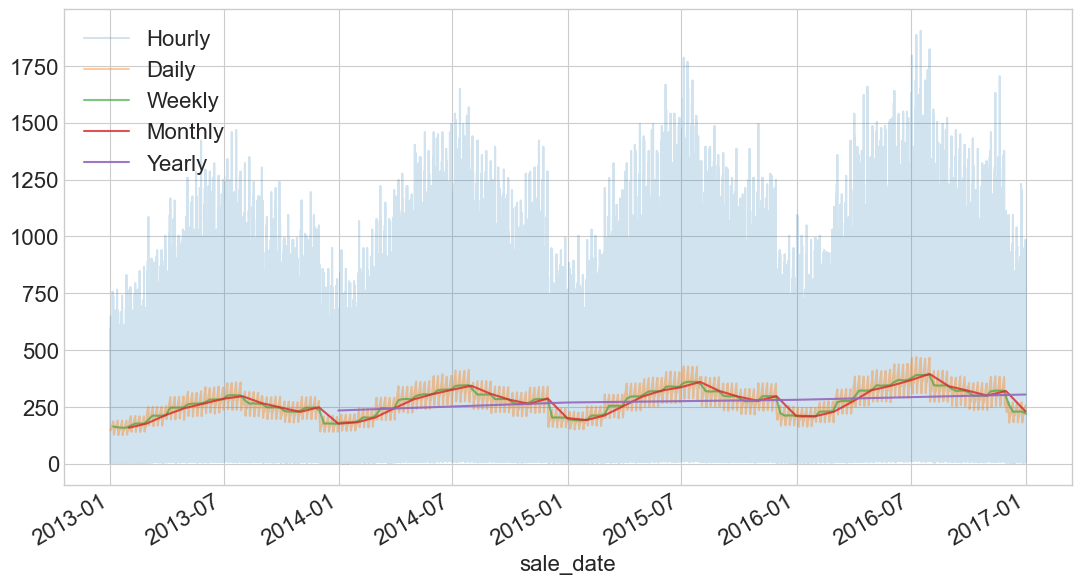

In [14]:
y.plot(alpha=0.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.4, label='Daily')
y.resample('W').mean().plot(alpha=0.6, label='Weekly')
y.resample('M').mean().plot(alpha=0.8, label='Monthly')
y.resample('Y').mean().plot(alpha=0.9, label='Yearly')
plt.legend()
plt.show()

### Seasonal plotting

In [15]:
y.groupby([y.index.year, y.index.month]).mean().head()

sale_date  sale_date
2013       1            157.894723
           2            176.411855
           3            214.181650
           4            244.460082
           5            264.663123
Name: sales_total, dtype: float64

In [16]:
y.groupby([y.index.month, y.index.year]).mean().unstack()

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


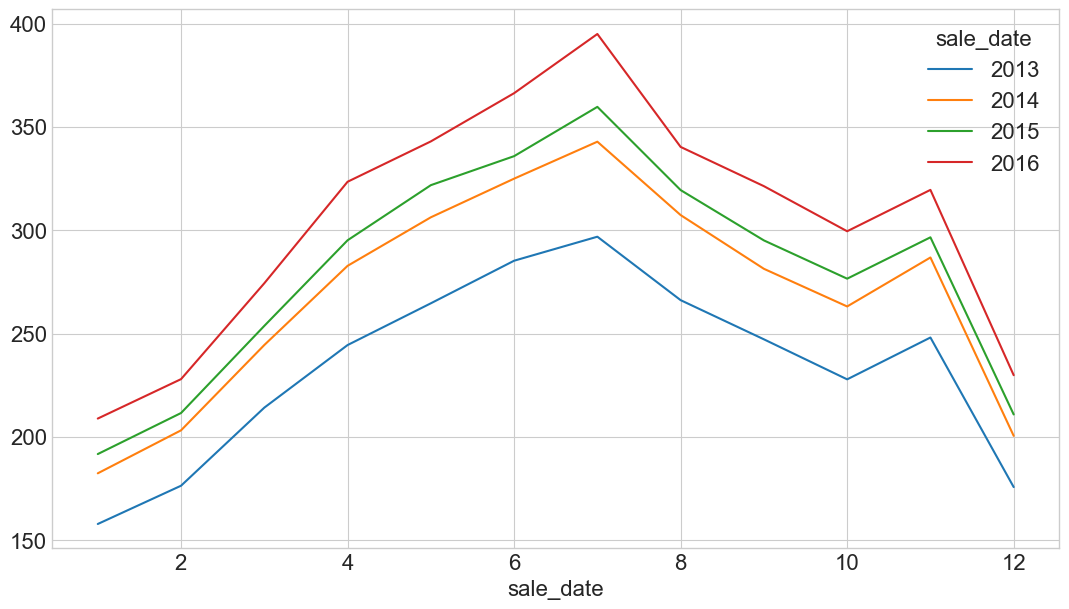

In [17]:
y.groupby([y.index.month, y.index.year]).mean().unstack().plot()
plt.show()

In [18]:
table = y.groupby([y.index.month, y.index.year]).mean().unstack()

In [19]:
table

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


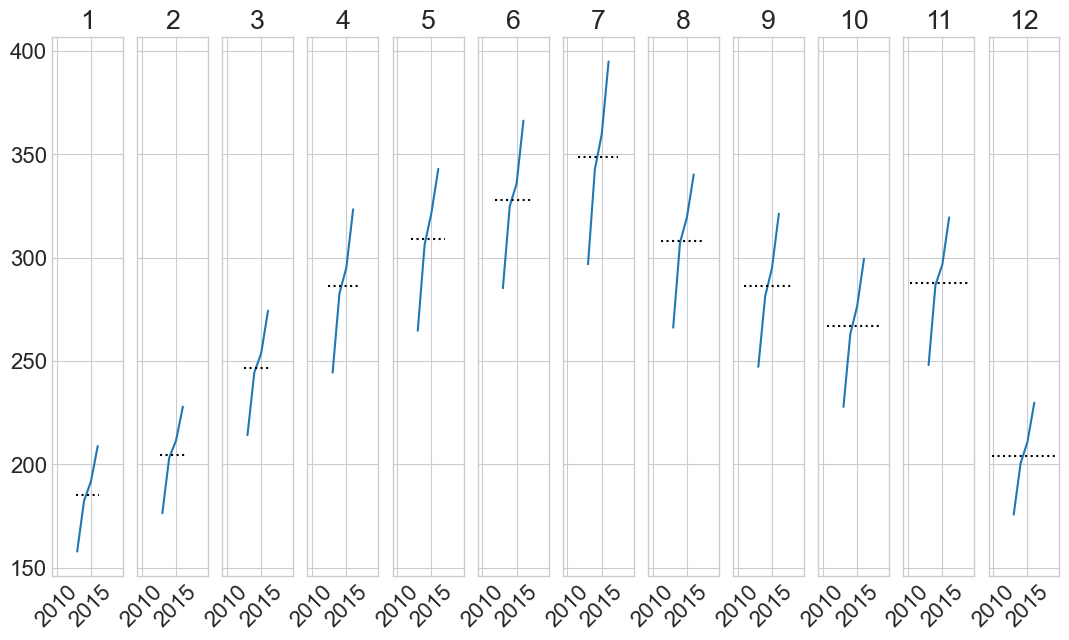

In [20]:
# define a figure and axes for a row of 12 plots
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
# define a for loop that goes through these 12 axis objects (one for each month of the year)
# for every ax in our axes, aaaand for every tuple that is :
# a) a row index (month)
# b) a row content (subset)
# (a and b are both returned iteratively by pandas iterrows)
# we take the contents of the row in subset
# and treat it like a series and plot that cross tabulation with the year 
# so we get a line for the average temp of that month for each year
# with an appended line for the mean across all years
for ax, (month, subset) in zip(axs, table.iterrows()):
    # plot the contents of the row, specify the axis it sits on
    subset.plot(ax=ax, title=month)
    # plot our mean line, going from the beginning to the end of the subplot with *ax.get_xlim()
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls=':')
    # negate the outside label by defining it as an empty string
    ax.set(xlabel='')
    # rotate my years
    ax.tick_params('x', rotation=45)

In [21]:
weekly = train.resample('W')[['sales_total']].mean()
# based on the aggregate of week, 
# I'm going to build out a Series of r values
# based on pairs of series defined by a lag shift
s = pd.Series(
    {
        # key == lag number
        # value == pearson's r from the relationship between
        # the present week and however much we shift out
        lag: stats.pearsonr(
            weekly.sales_total.iloc[:-lag],
            weekly.sales_total.shift(-lag).dropna())[0]
        # for every shift in range 1 to however long we go out
        for lag in range(1, 52 * 3)
    }) # wrapped as a Series

In [22]:
s

1      0.966706
2      0.919112
3      0.870742
4      0.819616
5      0.757727
         ...   
151    0.701527
152    0.787623
153    0.838262
154    0.885317
155    0.934318
Length: 155, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

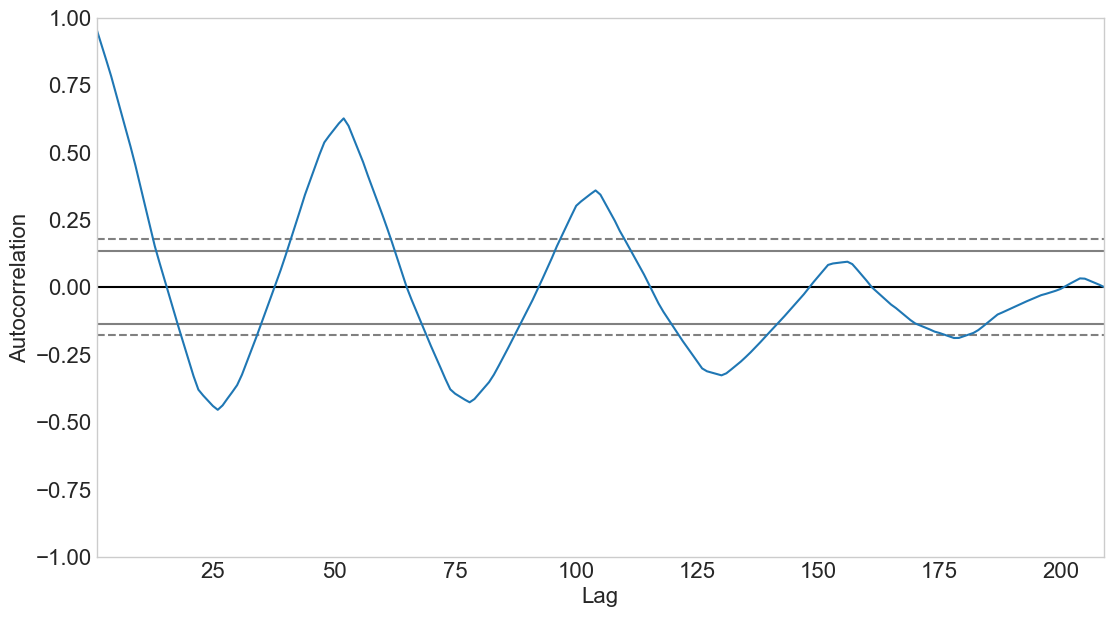

In [23]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

## Germany power

In [24]:
df = p.prep_germany_opsd()

In [25]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year,Wind_Solar
Date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,0.0
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,0.0
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,0.0
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,0.0
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,0.0


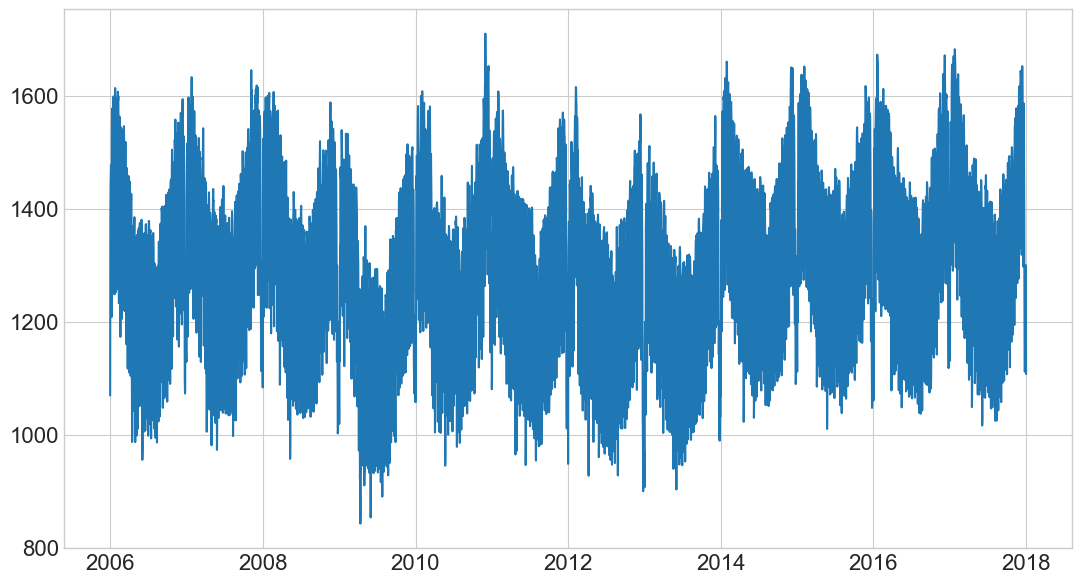

In [30]:
plt.plot(df.index, df.Consumption)

plt.show()

In [48]:
train = df.loc[:'2014']

In [47]:
test = df.loc['2015':]

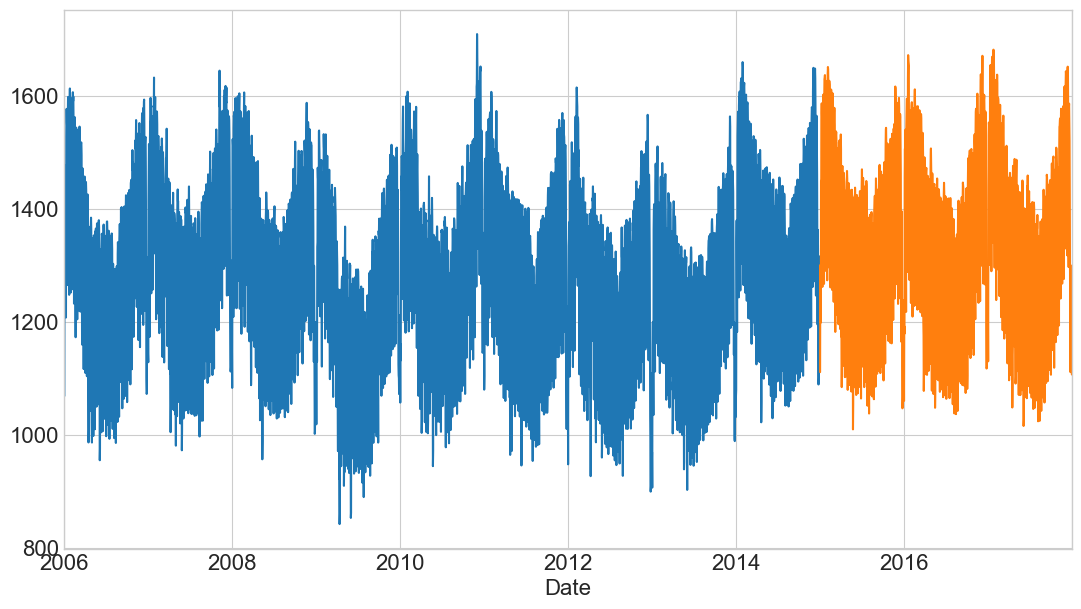

In [49]:
train.resample('D').Consumption.mean().plot()
test.resample('D').Consumption.mean().plot()
plt.show()


In [50]:
train.size / df.size

0.7499429614419347

#### average week, month, year

In [51]:
y= train.Consumption

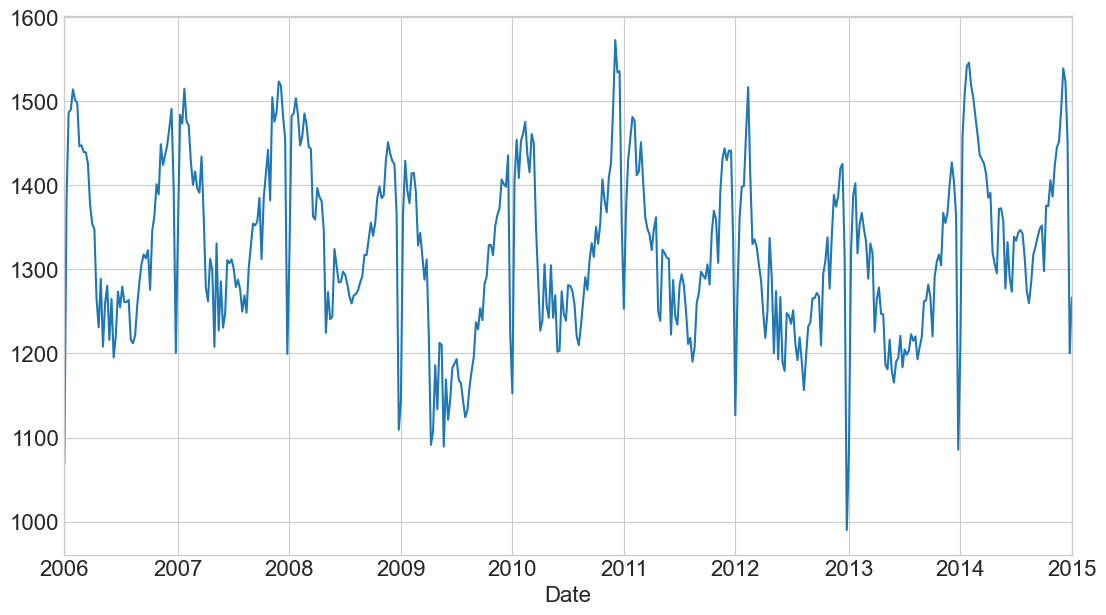

In [56]:
y.resample('W').mean().plot()
plt.show()

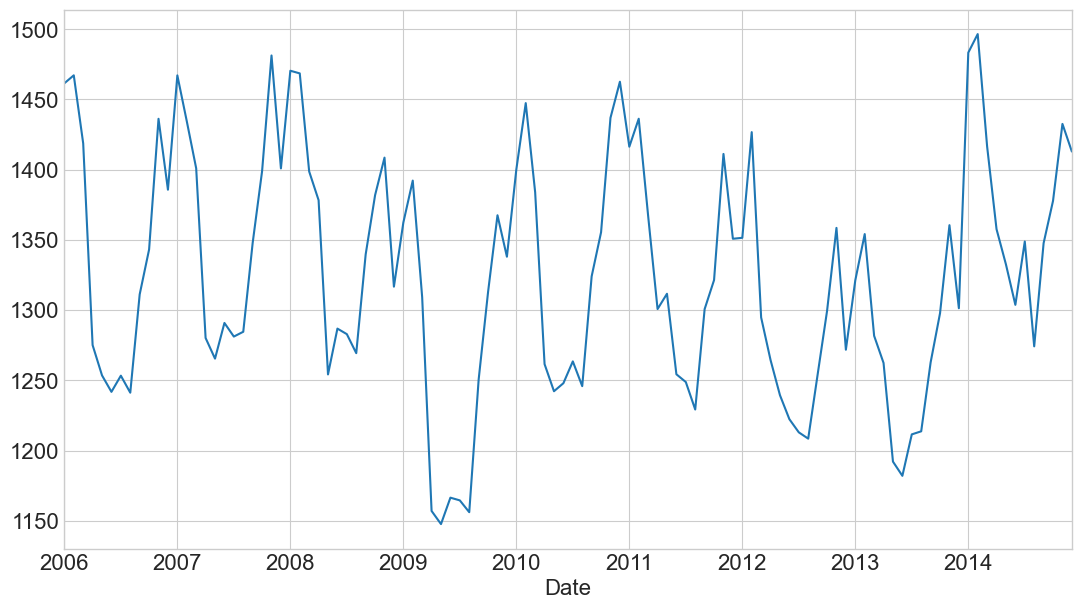

In [57]:
y.resample('M').mean().plot()
plt.show()

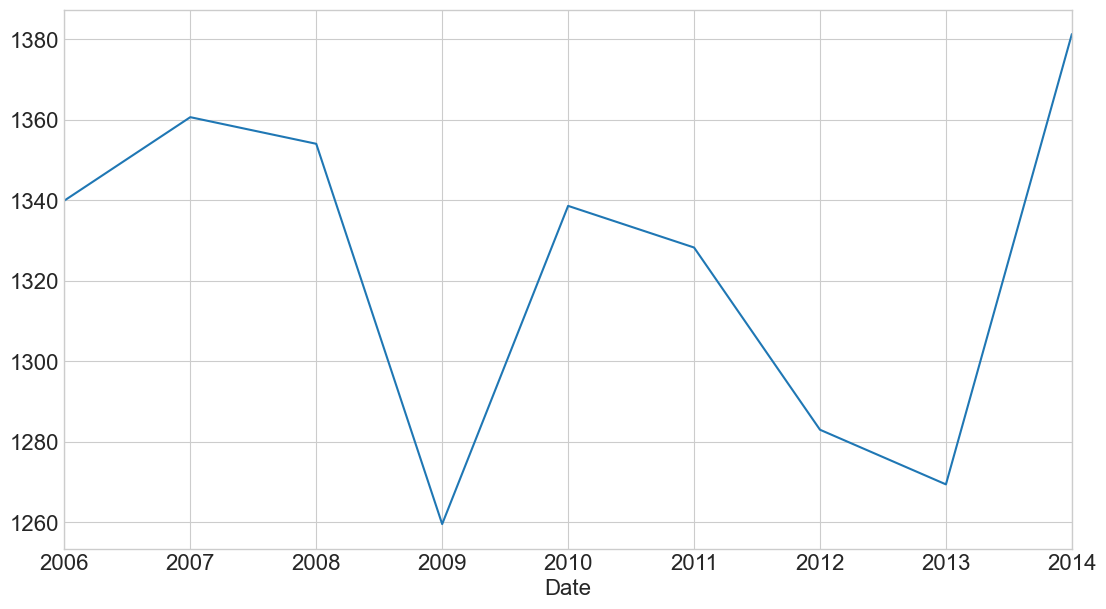

In [59]:
y.resample('Y').mean().plot()
plt.show()

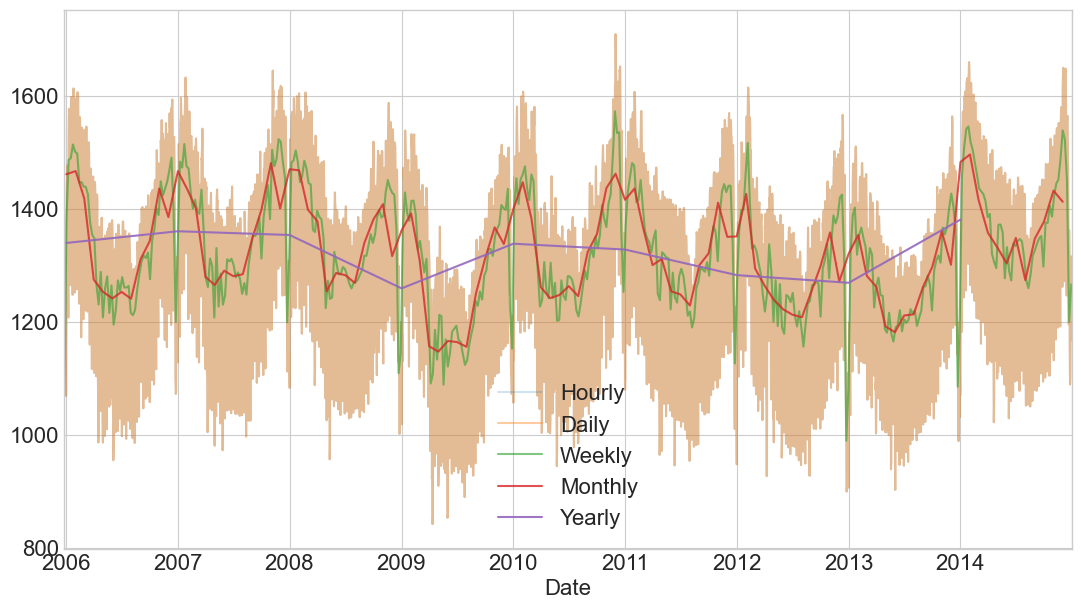

In [60]:
y.plot(alpha=0.2, label='Hourly')
y.resample('D').mean().plot(alpha=0.4, label='Daily')
y.resample('W').mean().plot(alpha=0.6, label='Weekly')
y.resample('M').mean().plot(alpha=0.8, label='Monthly')
y.resample('Y').mean().plot(alpha=0.9, label='Yearly')
plt.legend()
plt.show()